___

<p style = "font-family:courier;font-size:25px;">
BR35H-MASK-RCNN      
</p>

<p style = "font-family:courier;font-size:15px;">
Capstone Phase 5 Project     
</p>

<b>Name:</b> Ansel Vallejo

<i><font color = 'gray'>Source: </font></i>
https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

___

#### <b> Overview </b>

<div style="text-align: justify">
In the medical field, Brain tumor is seen as a serious, abnormal growth of cells in or near the brain that can be either benign, which is non-cancerous or malignant, which is cancerous. There are many treatments an individual with such tumor can receive, such as radiation therapy, chemotherapy, therapeutic drug, etc. Brain tumor can be seen via Magnetic Resonance Imaging (MRI) scanned images. Human error is prone to occur in any industry, and because of such error in the medical field can cost a life. To detect and identify what constitutes a benign or malignant tumor without human intervention would be to build a robust deep learning model to help the medical practitioner properly classify a cancerous from noncancerous tumors using over 3000 MRI scan trained images and testing images to help better serve the model.
</div>

<b>Algorithm Implemented: </b> <i>Convolutional Neural Network</i> (Deep Learning) <br>
<b>Data type: </b> Unstructured <br>
<br>
<br>
<b>Data Classification: </b>
    <ul>
        <li><b>NO</b> (no tumor) - classified as 0</li>
        <li><b>YES</b> (yes tumor) - classified as 1</li>
    </ul>


___

### Import Libraries

In [57]:
import pandas as pd                       #Data Analysis and manipulation tool
import numpy as np                        #Scientific computing
import matplotlib.pyplot as plt           #Visualization
from matplotlib.colors import Normalize
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#Import image data
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
from PIL import Image
import random
import pickle
import cv2
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#KERAS
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

                                                Number of GPUs Available

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

___

### Functions 
<i>(Tools)</i>

In [79]:
def model_acc_loss(test, loss):
    print('Model Accuracy (Test data)')
    print('________________________________________')
    print('')
    print('Model Accuracy:      ', test)
    print('Test Loss:          ', loss)
    print('________________________________________')
    print('')

    return

___

### Import Data

<b> load_data </b> <i>(Function)</i>


<div style="text-align: justify">
The function is iterating through the <i>directory</i>, and <i>categories</i> defined, then classifying the data by 'yes' <b>{1}</b> or 'no' <b>{0}</b>, depending on the data folder the images are extracted from. After categorizing the data, we proceed in converting the images into grayscale, and resizing according to spec. we then append the <i>data</i> list to combine both the resized array with its respective categorical number. After the data is prepared, the data is shuffled then separated into the <i> image</i> and <i>label</i> list, followed up by reshaping the <i>image</i> variable list. Then, the data is returned and included into the <i> image </i> and <i>label</i> variables outside of the function to then be referenced and follow up with saving into a pickle file format to then be referenced when needed.
    </div>

In [4]:
#import cv2

#Empty list to store images and labels
data = []

#Folder category found in data folder
directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 64

#Function that loads the image data, categorizes images, resize, shuffles, and creates image and label lists
def load_data():
    
    for classification in categories:
        path = os.path.join(directory, classification)
        cat_num = categories.index(classification)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, cat_num])
            except Exception as e:
                pass
       
    random.shuffle(data)


    image = []
    label = []   
    for images, labels in data:
        image.append(images)
        label.append(labels)
        
    image = np.array(image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    label = np.array(label)
    
    
    return image, label, img_array


image, label, img_array= load_data()


___

### Saving Data

 <b> Save Data</b> <i>(.pkl file extension)</i><br>


[[DESCRIPTION]]

In [5]:
pickle_out = open('image.pickle', 'wb')
pickle.dump(image, pickle_out)
pickle_out.close()
    
pickle_out = open('label.pickle', 'wb')
pickle.dump(label, pickle_out)
pickle_out.close()

In [6]:
pickle_in = open('image.pickle', 'rb')
image = pickle.load(pickle_in)

pickle_in = open('label.pickle', 'rb')
label = pickle.load(pickle_in)

___

###### <i> <font color = 'blue'> TESTING pickle_in </font> </i>

In [111]:
np.count_nonzero(label)

1500

___

<b> plot_images_5_5</b> <i>(Function)</i><br>

<div style="text-align: justify">
The function creates a 5x5 grid of subplots using the subplots() function. It then loops through each subplot and resizes the corresponding image using the resize() function from OpenCV. It then displays the image in the subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the set_title() function from matplotlib. The x and y ticks are removed from each subplot using the set_xticks() and set_yticks() functions from matplotlib.
    </div>

In [9]:
def plot_images_5_5():
    
    
    fig, axs = plt.subplots(5, 5)

    for i in range(len(axs)):
        for j in range(len(axs[i])):
            new_array = cv2.resize(image[i*len(axs[i])+j], (IMG_SIZE, IMG_SIZE))
            axs[i][j].imshow(new_array, cmap='gray')
            axs[i][j].set_title(categories[label[i*len(axs[i])+j]])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            
            
    plt.tight_layout()
    plt.show()

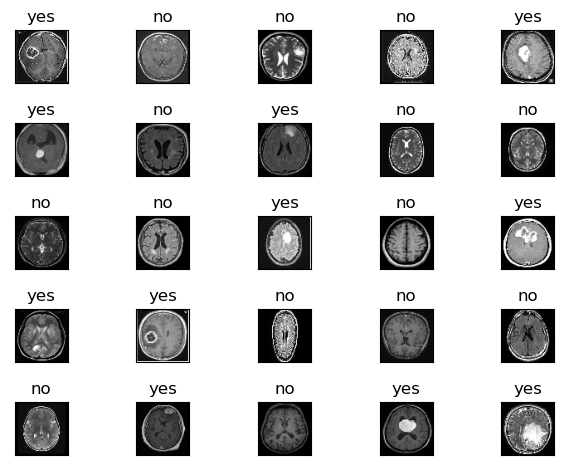

In [10]:
plot_images_5_5()

___

<b>plot_images_2_3</b> <i>(Function)</i>

<div style="text-align: justify">
The function loops through the first 6 images in the image list and creates a 2x3 grid of subplots using the subplot() function. It then displays the corresponding image in each subplot using the imshow() function from matplotlib. The title of each subplot is set to the corresponding category label using the title() function from matplotlib. The x and y ticks are removed from each subplot using the xticks() and yticks() functions from matplotlib.
    </div>

In [11]:
def plot_images_2_3():
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(image[i])
        plt.title(categories[label[i]])
        plt.xticks([])
        plt.yticks([])

    plt.show()

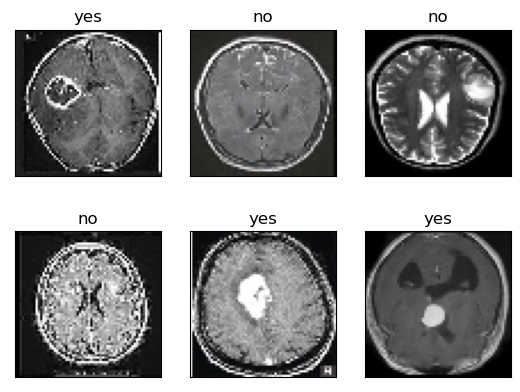

In [12]:
plot_images_2_3()

___

___

### <font size = '4'> <b> DISPLAY IMAGE BY IMAGE SIZE </b></font>

<b><i> <font color = 'purple'> (1 x 3) </font> </i></b>

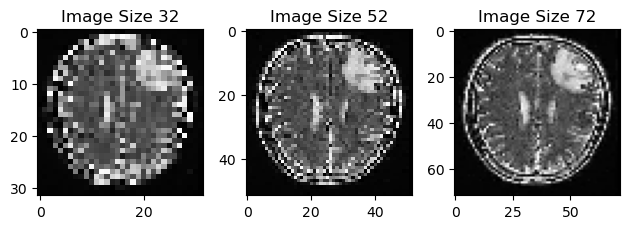

In [80]:
fig, axs = plt.subplots(1, 3)

directory = "data/"
categories = ["no", "yes"]
IMG_SIZE = 32

for i in range(len(axs)):
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    axs[i].imshow(new_array, cmap='gray')
    axs[i].set_title(f'Image Size {IMG_SIZE}')
    IMG_SIZE += 20

plt.tight_layout()
plt.show()

<b><i> <font color = 'purple'> (3 x 3) </font> </i></b>

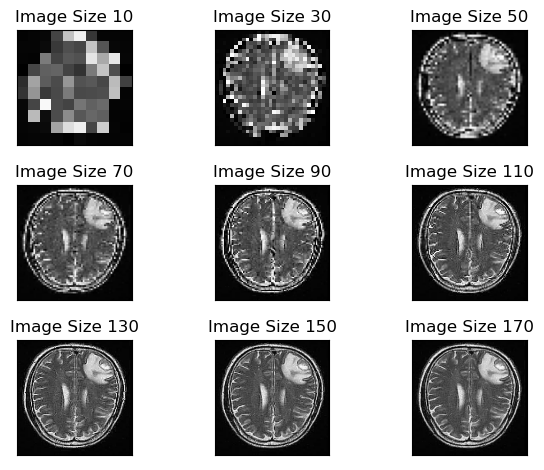

In [14]:
fig, axs = plt.subplots(3, 3)

IMG_SIZE = 10

for i in range(len(axs)):
    for j in range(len(axs)):
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        axs[i, j].imshow(new_array, cmap='gray')
        axs[i, j].set_title(f'Image Size {IMG_SIZE}')
        IMG_SIZE += 20

for ax in axs.flat:
    ax.set(xticks=[], yticks=[])
        
plt.tight_layout()
plt.show()

___

___

In [8]:
image = image / 255

### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(image, 
                                                    label, 
                                                    test_size=0.20, 
                                                    random_state = 42)

In [55]:
# print(X_train)

In [56]:
X_train_resized = resize(X_train, (len(X_train), IMG_SIZE, IMG_SIZE))
X_test_resized = resize(X_test, (len(X_test), IMG_SIZE, IMG_SIZE))

NameError: name 'resize' is not defined

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2400, 64, 64, 1)
(2400,)
(600, 64, 64, 1)
(600,)


In [10]:
X_train = normalize(X_train, axis =1)
X_test = normalize(X_test, axis =1)

___

### <b> Sequential Model </b>

In [22]:
model = Sequential()

In [63]:
model.add(Conv2D(32, (3,3), input_shape= image.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Compile
#model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

################################################################################
################################################################################

<b>VER. 2</b>

In [126]:
#VER. 2
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=image.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(X, y, epochs = 10, batch_size = 20, validation_split = 0.1)

In [23]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=image.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<b><font color='red'> EXECUTE </font></b>

In [18]:
results = model.fit(image, label, batch_size = 16, 
          verbose=1, 
          epochs=50,
          validation_data= (X_test, y_test),
          shuffle = False)

model.save('brain_tumor_100epochs_v6.5')

Epoch 1/50
188/188 [==============================] - 16s 84ms/step - loss: 1.8557 - accuracy: 0.7437 - val_loss: 0.9990 - val_accuracy: 0.7890
Epoch 2/50
 58/188 [========>.....................] - ETA: 9s - loss: 0.9824 - accuracy: 0.8093

KeyboardInterrupt: 

___

In [13]:
train test split
fitting on train checking on test

SyntaxError: invalid syntax (1276881593.py, line 1)

### <b>Data Augmentation</b> <i>(Using ImageDataGenerator)</i>

In [24]:
#Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Compile
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

<b><font color='red'> EXECUTE </font></b> <i>(with Augmentation)</i>

In [25]:
#Run model (Augmented version)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
results = model.fit(X_train, y_train, batch_size=16, epochs=50,
                    validation_data=(X_test, y_test), shuffle=False,
                    callbacks=[early_stopping])

#Save model (Augmented version)
model.save('brain_tumor_500_epochs_augmented_v4.h5')

Epoch 1/50
150/150 [==============================] - 12s 75ms/step - loss: 0.7003 - accuracy: 0.7292 - val_loss: 0.5323 - val_accuracy: 0.7800
Epoch 2/50
150/150 [==============================] - 11s 76ms/step - loss: 0.5824 - accuracy: 0.7633 - val_loss: 0.5164 - val_accuracy: 0.8133
Epoch 3/50
150/150 [==============================] - 12s 79ms/step - loss: 0.5577 - accuracy: 0.7875 - val_loss: 0.4805 - val_accuracy: 0.8317
Epoch 4/50
150/150 [==============================] - 12s 79ms/step - loss: 0.5216 - accuracy: 0.8167 - val_loss: 0.5000 - val_accuracy: 0.8600
Epoch 5/50
150/150 [==============================] - 12s 80ms/step - loss: 0.4993 - accuracy: 0.8400 - val_loss: 0.4335 - val_accuracy: 0.8783
Epoch 6/50
150/150 [==============================] - 12s 83ms/step - loss: 0.4598 - accuracy: 0.8567 - val_loss: 0.4288 - val_accuracy: 0.8883
Epoch 7/50
150/150 [==============================] - 13s 84ms/step - loss: 0.4296 - accuracy: 0.8800 - val_loss: 0.3829 - val_accuracy:

___

<b> Evaluate model against the test data</b>

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 56ms/step - loss: 0.2388 - accuracy: 0.9600


In [27]:
model_acc_loss(test_acc, test_loss)

NameError: name 'model_acc_loss' is not defined

___

<i>Summary</i>

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [42]:
results.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1c9d8a470d0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5490754842758179,
   0.42540547251701355,
   0.31456440687179565,
   0.22132433950901031,
   0.16236194968223572,
   0.11021943390369415,
   0.0695020854473114,
   0.05887587368488312,
   0.03215130791068077,
   0.025531752035021782],
  'accuracy': [0.7233333587646484,
   0.809166669845581,
   0.8700000047683716,
   0.909583330154419,
   0.9454166889190674,
   0.9641666412353516,
   0.9791666865348816,
   0.9829166531562805,
   0.9920833110809326,
   0.9929166436195374],
  'val_loss': [0.4515177011489868,
   0.31613463163375854,
   0.2116173654794693,
   0.15402743220329285,
   0.09838595241308212,
   0.05772896483540535,
   0.0352964885532856,
   0.025901062414050102,
   0.019818419590592384,
   0.009129732847213745],
  'val_accuracy': [0.7929166555404663,
   0.8704166412353516,
   0.9045833349227905,
   0.94125002

### <b><font size = '5' color = 'green'> MODEL EVALUATION (with AUGMENTATION) </font></b>

<i> Evaluation </i>

In [68]:
test_loss, test_acc = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 17ms/step - loss: 0.2022 - accuracy: 0.9250


<i> Model Accuracy and Test Loss </i>

In [38]:
model_acc_loss(test_acc, test_loss)

Model Accuracy (Test data)
________________________________________

Model Accuracy:       0.9800000190734863
Test Loss:           0.08096947520971298
________________________________________



<i>Attribute and values</i>

In [28]:
results_augmented.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x16e0e5022e0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6753212809562683,
   0.6478011012077332,
   0.6269063353538513,
   0.6061310768127441,
   0.6020047664642334,
   0.597112238407135,
   0.5818744897842407,
   0.5740976333618164,
   0.5677558779716492,
   0.5801303386688232,
   0.5524659752845764,
   0.5446001887321472,
   0.5423131585121155,
   0.5261513590812683,
   0.5086605548858643,
   0.4806669056415558,
   0.4605681300163269,
   0.4338361620903015,
   0.423114150762558,
   0.4380134046077728,
   0.438005268573761,
   0.4100959897041321,
   0.3702140748500824,
   0.3764950931072235,
   0.35320189595222473,
   0.3603604733943939,
   0.3238241374492645,
   0.32773640751838684,
   0.31095102429389954,
   0.30320921540260315,
   0.3389776647090912,
   0.32020601630210876,
   0.3086368441581726,
   0.29359883069992065,
   0.2757415175437927,
   0.26882022619247437,


<i><font color = 'blue'>Accuracy and Loss Plot </font></i>

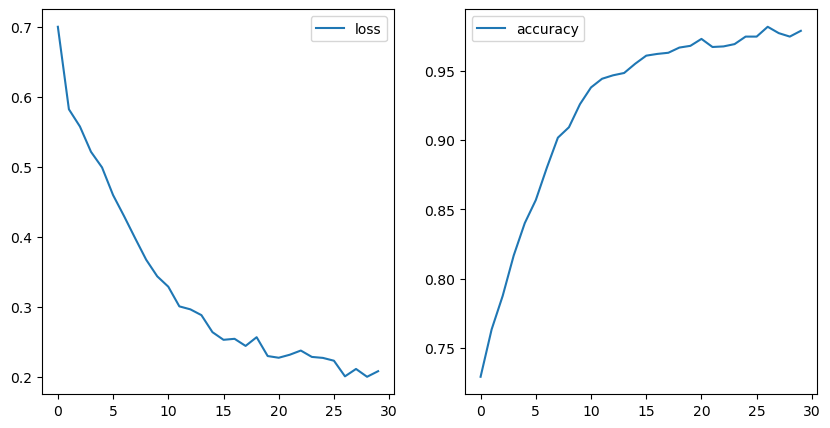

In [31]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(x=results.epoch, y=sigmoid_accuracy, ax=ax2, label='accuracy');

### Evaluate Model

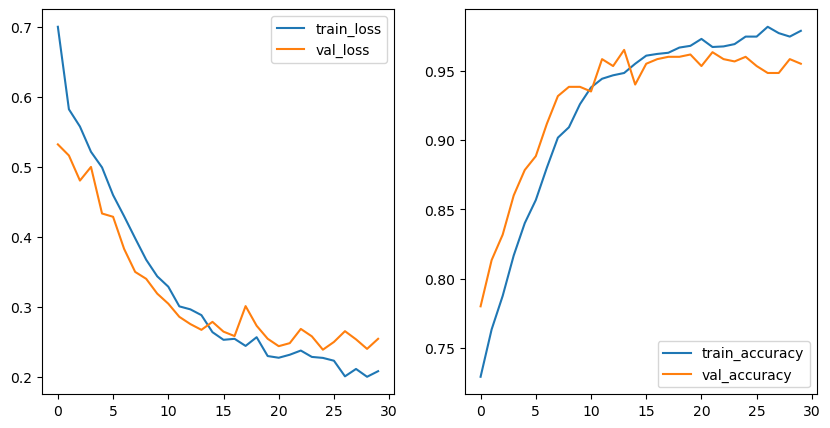

In [30]:
train_loss = results.history['loss']
train_acc = results.history['accuracy']
val_loss = results.history['val_loss']
val_acc = results.history['val_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [143]:
pred_tumor_list = list_dir(pred_tumor)
for i in range(len(pred_tumor_list)):
    pred_tumor_list[i] = pred_tumor + img_dir + pred_tumor_list[i]

In [43]:
# testing_predictions = model.predict(X_test)
# #y_pred = model.predict(X_test)
# print(classification_report(y_test,testing_predictions))
# print(testing_predictions)

# #print(y_pred)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
# Print classification report
# print(classification_report(y_test, y_pred, zero_division=1))

19/19 [==============================] - 1s 58ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [42]:
y_pred = model.predict(X_test[27].reshape(1, IMG_SIZE, IMG_SIZE, 1))
y_pred

1/1 [==============================] - 0s 21ms/step


array([[0.00014203]], dtype=float32)

<b> Get all the data in the directory data/validation (Train: 500 images) (Test: 100 images), and reshape them </b>

#### <b><font color = 'red'>LOAD THE DATA</font> </b>

In [340]:
df_list = list(yes_no_df['path'].astype(str))

In [317]:
def load_images_from_directory(train_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#     validation_generator = test_datagen.flow_from_directory(
#         val_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')

#     predict_generator = test_datagen.flow_from_directory(
#         pred_dir,
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode=None,
#         shuffle=False)

    return train_generator #, validation_generator, predict_generator

In [348]:
load_images_from_directory('data/')

Found 0 images belonging to 0 classes.


In [ ]:


train_img_dir = 'Br35H-Mask-RCNN/VAL/'
test_img_dir = 'Br35H-Mask-RCNN/TEST/'

In [82]:
train_generator = ImageDataGenerator().flow_from_directory(
    train_img_dir,
    target_size= (256, 256),
    batch_size = 500)

Found 0 images belonging to 0 classes.


In [83]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_img_dir,
    target_size= (256, 256),
    batch_size = 100)

Found 0 images belonging to 0 classes.


In [35]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

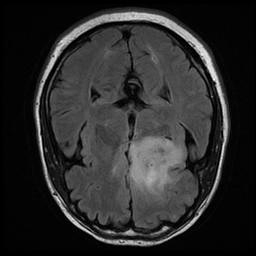

In [36]:
array_to_img(train_images[10])

<b> Transform the matrix </b>

Train

In [38]:
train_img_unrow = train_images.reshape(500, -1).T

In [39]:
np.shape(train_img_unrow)

(196608, 500)

Test

In [40]:
m = 100
test_img_unrow = test_images.reshape(m, -1).T

In [41]:
np.shape(test_img_unrow)

(196608, 100)

Class Indices

In [43]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [44]:
train_labels_final = train_labels.T[[1]]

In [45]:
np.shape(train_labels_final)

(1, 500)

In [46]:
test_labels_final = test_labels.T[[1]]

In [47]:
np.shape(test_labels_final)

(1, 100)

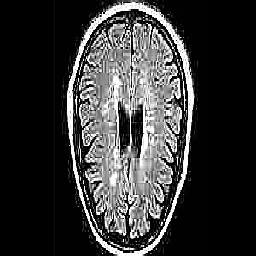

In [48]:
array_to_img(train_images[240])

In [49]:
train_labels_final[:,240]

array([0.], dtype=float32)

### Data Standardization

In [50]:
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

numpy.ndarray

### Logistic Regression-based Neural Network

<b> Initialize b </b>

In [51]:
b = 0

<b> Initialize w </b>

In [52]:
def init_w(n):
    w = np.zeros((n,1))
    return w

In [56]:
w = init_w(256*256*3)

<b> Forward Propagation </b>

In [57]:
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [58]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [59]:
print(dw)

print(db)

print(cost)

[[-0.00364706]
 [-0.00269804]
 [-0.0033451 ]
 ...
 [-0.01177647]
 [-0.01160784]
 [-0.01128235]]
-0.002
0.6931471805599454


<b> Optimization </b>

In [60]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [61]:
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 50: 0.521153
Cost after iteration 100: 0.454500
Cost after iteration 150: 0.411769


<b> Label Predictions </b>

In [62]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

In [63]:
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

array([[1., 1., 0., 0.]])

<b> Overall Model </b>

In [64]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

In [65]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147


C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
C:\Users\msavg\AppData\Local\Temp\ipykernel_1844\3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: 1.428492
Cost after iteration 100: 0.232415
Cost after iteration 150: 0.082094
Cost after iteration 200: 0.037336
Cost after iteration 250: 0.024759
Cost after iteration 300: 0.017805
Cost after iteration 350: 0.013923
Cost after iteration 400: 0.011646
Cost after iteration 450: 0.010154
Cost after iteration 500: 0.009082
Cost after iteration 550: 0.008264
Cost after iteration 600: 0.007614
Cost after iteration 650: 0.007081
Cost after iteration 700: 0.006633
Cost after iteration 750: 0.006250
Cost after iteration 800: 0.005917
Cost after iteration 850: 0.005625
Cost after iteration 900: 0.005366
Cost after iteration 950: 0.005134
Cost after iteration 1000: 0.004925
Cost after iteration 1050: 0.004735
Cost after iteration 1100: 0.004562
Cost after iteration 1150: 0.004403
Cost after iteration 1200: 0.004256
Cost after iteration 1250: 0.004121
Cost after iteration 1300: 0.003995
Cost after iteration 1350: 0.003877
Cost after iteration 1400: 0.003768
Cost after i